## Data from GEO

The development of therapeutic strategies to combat immune-associated diseases requires the molecular mechanisms of human Th17 cell differentiation to be fully identified and understood. A number of SNPs from loci associated with immune-mediated disorders were foudn to be located at sites where STAT3 binds to induce Th17 cell specification. 

In this research, I analyze ChIP-seq data to identify binding site of STAT3 in Th17 cells. The original data at GEO is here https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE67183

### To download the raw FASTQ files from SRA (starting from a GEO entry):
https://www.ncbi.nlm.nih.gov/Traces/study/?acc=PRJNA279200&o=acc_s%3Aa
On that page, I found the SRR ID of that sequencing run, which are SRR1925779 and SRR1925780.

### Reference
Tripathi, S. K., Chen, Z., Larjo, A., Kanduri, K., Nousiainen, K., Äijo, T., Ricaño-Ponce, I., Hrdlickova, B., Tuomela, S., Laajala, E., Salo, V., Kumar, V., Wijmenga, C., Lähdesmäki, H., & Lahesmaa, R. (2017). Genome-wide Analysis of STAT3-Mediated Transcription during Early Human Th17 Cell Differentiation. Cell Reports (Cambridge), 19(9), 1888–1901. https://doi.org/10.1016/j.celrep.2017.05.013

## Check read quality

In [131]:
cd /mnt/storage/$USER/jupyternotebooks/Task2/

In [132]:
fastqc ChIP_STAT3.fastq

Started analysis of ChIP_STAT3.fastq
Approx 5% complete for ChIP_STAT3.fastq
Approx 10% complete for ChIP_STAT3.fastq
Approx 15% complete for ChIP_STAT3.fastq
Approx 20% complete for ChIP_STAT3.fastq
Approx 25% complete for ChIP_STAT3.fastq
Approx 30% complete for ChIP_STAT3.fastq
Approx 35% complete for ChIP_STAT3.fastq
Approx 40% complete for ChIP_STAT3.fastq
Approx 45% complete for ChIP_STAT3.fastq
Approx 50% complete for ChIP_STAT3.fastq
Approx 55% complete for ChIP_STAT3.fastq
Approx 60% complete for ChIP_STAT3.fastq
Approx 65% complete for ChIP_STAT3.fastq
Approx 70% complete for ChIP_STAT3.fastq
Approx 75% complete for ChIP_STAT3.fastq
Approx 80% complete for ChIP_STAT3.fastq
Approx 85% complete for ChIP_STAT3.fastq
Approx 90% complete for ChIP_STAT3.fastq
Approx 95% complete for ChIP_STAT3.fastq
Analysis complete for ChIP_STAT3.fastq


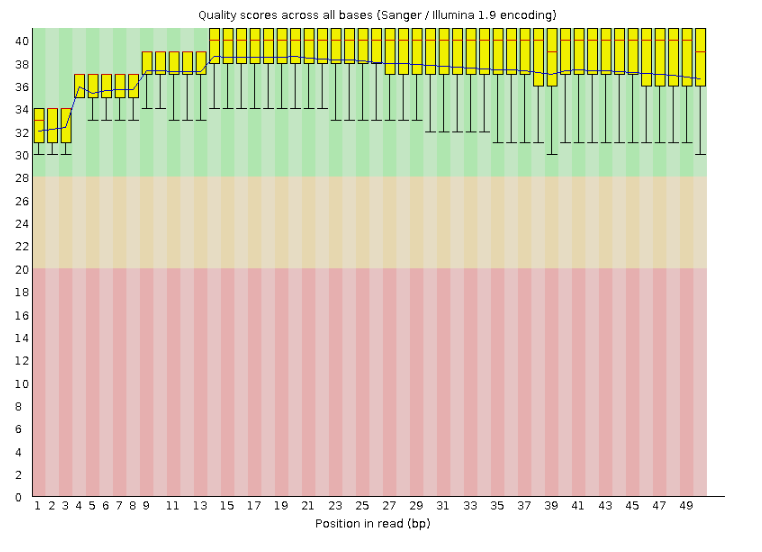

## Alignment of ETS1 ChIP-seq reads

To align the reads to the genome, bowtie2 was used

In [133]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 ChIP_STAT3.fastq -S ChIP_STAT3.sam 

27024686 reads; of these:
  27024686 (100.00%) were unpaired; of these:
    702856 (2.60%) aligned 0 times
    18579582 (68.75%) aligned exactly 1 time
    7742248 (28.65%) aligned >1 times
97.40% overall alignment rate


The overall alignment rate is good enough.

In [134]:
head -500 ChIP_STAT3.sam | tail -5

SRR1925779.410	16	chr2	218487839	42	50M	*	0	0	ATCCCTAACACAGTCCAGATAACCAAGGCCCTCACCTGTTCTGAAACTCA	IHJJIIIIIIJJIGJIJIJIHFJJJJJJJJJIHFJJJHHHHHFFFDFCCC	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:50	YT:Z:UU
SRR1925779.411	0	chr4	102776147	42	50M	*	0	0	TGGCTTTAGTTATATTATAATCTACATTCTTAAAATTTTCTCTAGATTCT	@CCDFDFFHHGGFJIJIJJJJEGGIIGIG,CHIJIJJJJJGIJIGGIIJJ	AS:i:-3	XN:i:0	XM:i:1	XO:i:0	XG:i:0	NM:i:1	MD:Z:29A20	YT:Z:UU
SRR1925779.412	0	chr3	119501127	42	50M	*	0	0	AAAGAACTTACCACCAAGCAGGTATGGTTTTTCTTTCTTTCTCTTTTGCT	CCCFFFFFHGHDHIGHIGGGGGCBHHGIJIJGDHIG<FHGB@?FHIFADG	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:50	YT:Z:UU
SRR1925779.413	16	chr2	162271425	42	50M	*	0	0	TGGGCAGATAAAAAGCCTCTGCCGCTCTTGGCCCTCTGGCTCAGGCCGAG	FHIEBGGHGIIHGDGIGGGEGIGEGGGIGHIJGHIIHHGHHBDF?FD@@@	AS:i:0	XN:i:0	XM:i:0	XO:i:0	XG:i:0	NM:i:0	MD:Z:50	YT:Z:UU
SRR1925779.414	0	chr1	211381926	12	50M	*	0	0	CAGGNTGGTCTCAAACTCCTGGGCTCAAGTGACCCGCCCACCTTGACCTC	?<;B##############################################	AS:i:-1	XS:i:-5	XN:i:0	XM:i

Convert the SAM file to BAM format (binary)

In [135]:
samtools view -S -b ChIP_STAT3.sam > ChIP_STAT3.bam

In [136]:
samtools view -c ChIP_STAT3.bam

27024686


27024686 reads are in the BAM file

In [137]:
# Number of mapped reads.
samtools view -c -F 260 ChIP_STAT3.bam

26321830


26321830 reads are mapped

Create the .bai index to use the BAM file in IGV

In [138]:
samtools sort -O bam -o ChIP_STAT3.sorted.bam ChIP_STAT3.bam

[bam_sort_core] merging from 6 files and 1 in-memory blocks...


In [139]:
samtools index ChIP_STAT3.sorted.bam

## Check the BAM file in IGV

Copy the ChIP_STAT3.sorted.bam and ChIP_STAT3.sorted.bam.bai to computer and open them with IGV.
According to the paper(Tripathi et al., 2017), <b>HNRNPH2</b> is one of the genes correlated to STAT3 and shows good peaks in IGV.

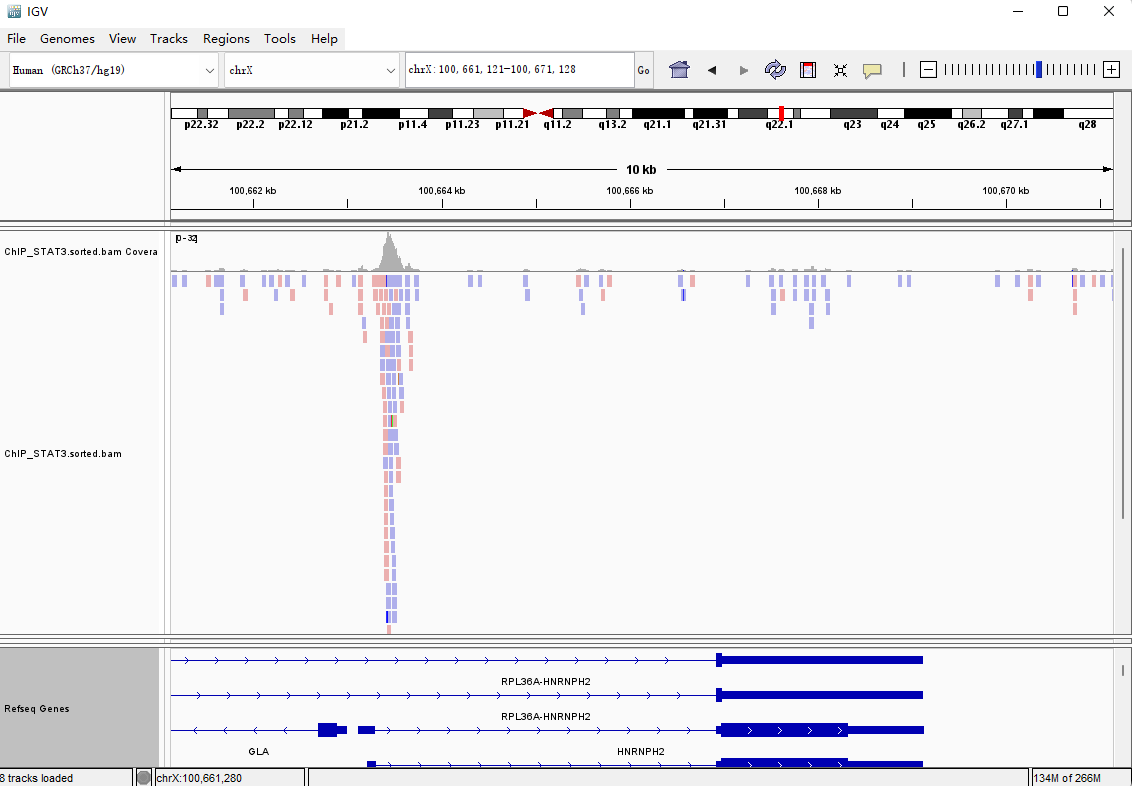

## Alignment of the control data ("input")

In [146]:
bowtie2 -x /mnt/storage/data/resources/bowtie2/hg19 ChIP_input.fastq -S ChIP_input.sam

18592363 reads; of these:
  18592363 (100.00%) were unpaired; of these:
    362460 (1.95%) aligned 0 times
    12772162 (68.70%) aligned exactly 1 time
    5457741 (29.35%) aligned >1 times
98.05% overall alignment rate


In [147]:
samtools view -S -b ChIP_input.sam > ChIP_input.bam

In [148]:
samtools sort -O bam -o ChIP_input.sorted.bam ChIP_input.bam

[bam_sort_core] merging from 4 files and 1 in-memory blocks...


In [149]:
samtools index ChIP_input.sorted.bam

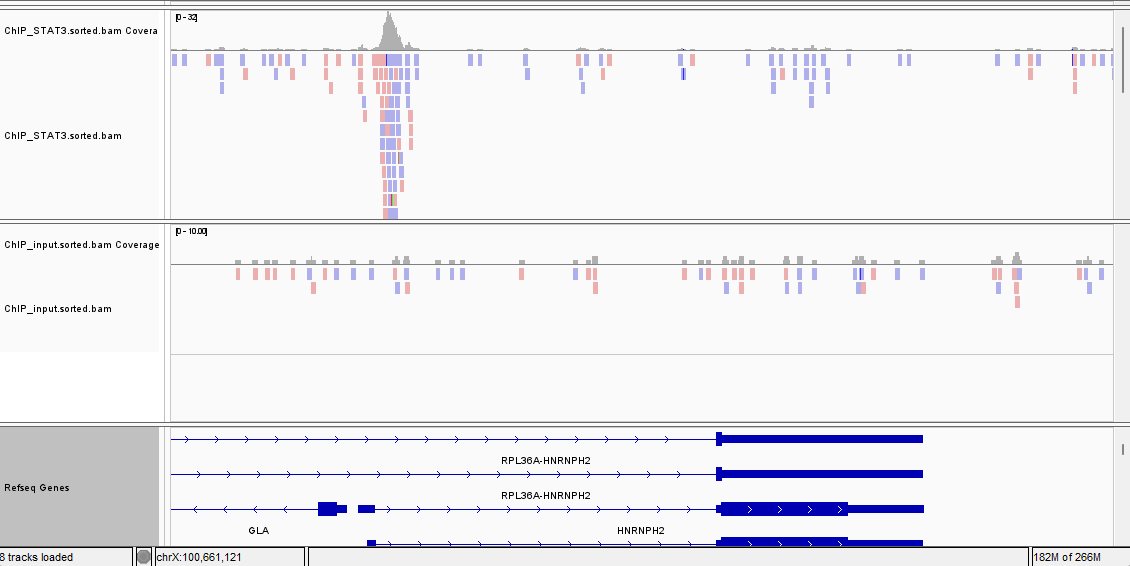

## Genome-wide coverage plots

Generate a bigwig file that contains only the coverage of the reads
Use the command bamCoverage from the package deeptools to create a bigwig file that can be used for visualization in IGV or UCSC Genome Browser

The genome size of GRCh37 is 2864785220

In [2]:
bamCoverage -b ChIP_STAT3.sorted.bam --normalizeUsing RPGC --effectiveGenomeSize 2864785220 -o stat3.bw

normalization: 1x (effective genome size 2864785220)
bamFilesList: ['ChIP_STAT3.sorted.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
defaultFragmentLength: read length
numberOfProcessors: 1
verbose: False
region: None
bedFile: None
minMappingQuality: None
ignoreDuplicates: False
chrsToSkip: []
stepSize: 50
center_read: False
samFlag_include: None
samFlag_exclude: None
minFragmentLength: 0
maxFragmentLength: 0
zerosToNans: False
smoothLength: None
save_data: False
out_file_for_raw_data: None
maxPairedFragmentLength: 1000


Open that .bw file in IGV.
Blue track is generated file, orange track is from the ChIP-atlas page of this data set http://chip-atlas.org/view?id=SRX965494

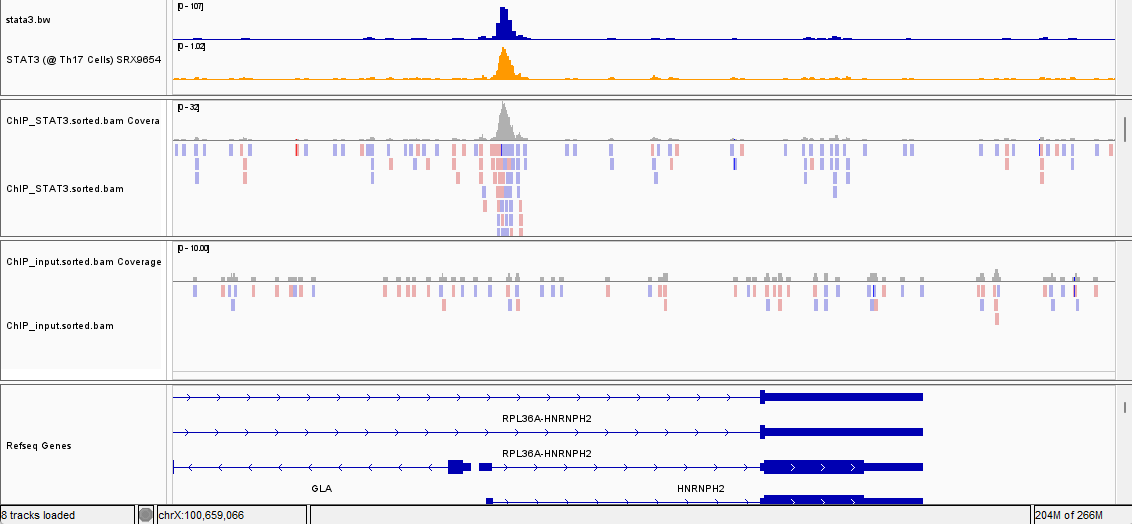

## Peak calling 

We can color the reads by strand (forward or reverse reads), and group reads by the strand.

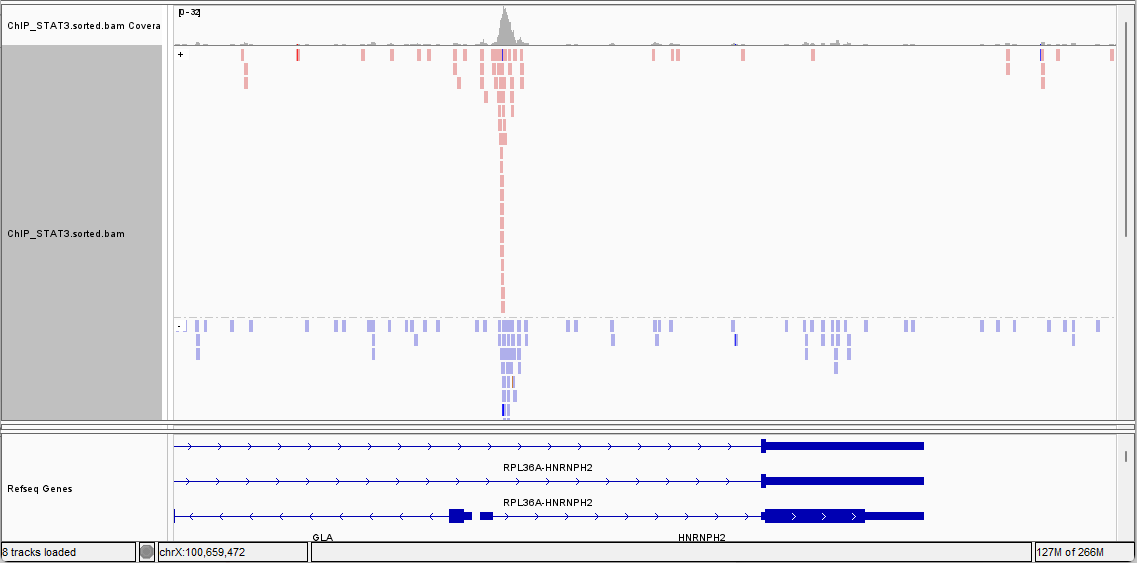

## Peak calling with MACS2

macs2 produces the following 4 files: `STAT3_peaks.xls`, `STAT3_peaks.narrowPeak`, `STAT3_summits.bed`, `STAT3_model.r`

In [3]:
macs2 callpeak -t ChIP_STAT3.bam -c ChIP_input.bam -n STAT3 -g hs -q 0.05

INFO  @ Mon, 02 Jan 2023 02:40:37: 
# Command line: callpeak -t ChIP_STAT3.bam -c ChIP_input.bam -n STATA3 -g hs -q 0.05
# ARGUMENTS LIST:
# name = STATA3
# format = AUTO
# ChIP-seq file = ['ChIP_STAT3.bam']
# control file = ['ChIP_input.bam']
# effective genome size = 2.70e+09
# band width = 300
# model fold = [5, 50]
# qvalue cutoff = 5.00e-02
# The maximum gap between significant sites is assigned as the read length/tag size.
# The minimum length of peaks is assigned as the predicted fragment length "d".
# Larger dataset will be scaled towards smaller dataset.
# Range for calculating regional lambda is: 1000 bps and 10000 bps
# Broad region calling is off
# Paired-End mode is off
 
INFO  @ Mon, 02 Jan 2023 02:40:37: #1 read tag files... 
INFO  @ Mon, 02 Jan 2023 02:40:37: #1 read treatment tags... 
INFO  @ Mon, 02 Jan 2023 02:40:37: Detected format is: BAM 
INFO  @ Mon, 02 Jan 2023 02:40:37: * Input file is gzipped. 
INFO  @ Mon, 02 Jan 2023 02:40:39:  1000000 
INFO  @ Mon, 02 Jan 2

In [4]:
cat STAT3_peaks.narrowPeak | wc -l

378


There are 378 peaks in the file. Probably we could increase the q value to have more peaks.

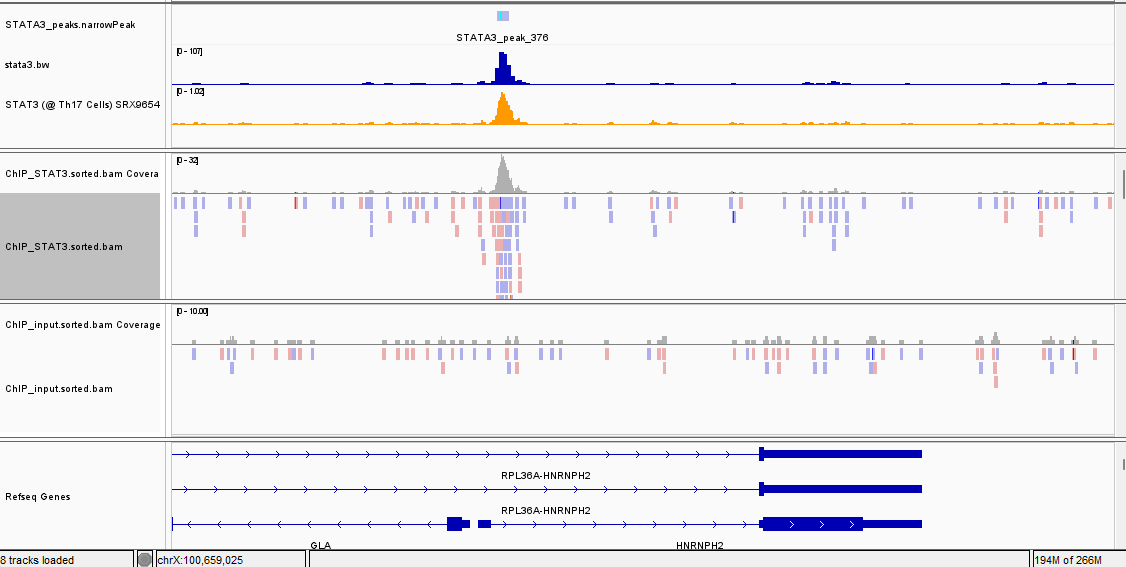

In [9]:
cat STAT3_peaks.narrowPeak | sort -k9 -g -r | head -300

chr17	40540664	40541048	STATA3_peak_117	508	.	15.84742	58.52065	50.84871	155
chr17	80408606	80408873	STATA3_peak_131	429	.	23.33802	50.33216	42.94104	133
chr10	104153784	104154064	STATA3_peak_40	296	.	18.09408	36.64484	29.67187	122
chr12	96883176	96883401	STATA3_peak_73	288	.	16.48736	35.84111	28.89120	120
chr1	11741137	11741334	STATA3_peak_4	288	.	16.09742	35.84111	28.89120	118
chr19	17958728	17958994	STATA3_peak_153	287	.	17.01950	35.66705	28.74959	139
chr13	111567709	111567965	STATA3_peak_81	263	.	17.24109	33.13252	26.30379	121
chr3	119041962	119042139	STATA3_peak_234	255	.	16.82492	32.30315	25.51752	67
chr2	24713661	24713885	STATA3_peak_179	251	.	16.74573	31.91116	25.12724	109
chr19	12904398	12904663	STATA3_peak_150	248	.	12.29136	31.57795	24.82682	134
chr1	150534515	150534812	STATA3_peak_19	246	.	14.92762	31.36613	24.62050	179
chr17	76254735	76254935	STATA3_peak_124	242	.	15.72691	30.92568	24.22798	142
chr20	30945729	30945917	STATA3_peak_204	235	.	15.86800	30.20930	23.52534	70
chr

Very good peaks in the file as expected!

In [6]:
cat STAT3_peaks.narrowPeak | cut -f 1-3 > STAT3_peaks.bed

In [7]:
computeMatrix reference-point \
    -S stat3.bw \
    -R STAT3_peaks.bed \
    --referencePoint center \
    -a 2000 \
    -b 2000 \
    --binSize 5 \
    -out STATA3.tab.gz

In [8]:
plotHeatmap \
    -m STAT3.tab.gz \
    -out STAT3_peaks.png \
    --heatmapHeight 15  \
    --refPointLabel peak.center \
    --regionsLabel peaks \
    --plotTitle 'ChIP-seq signal'

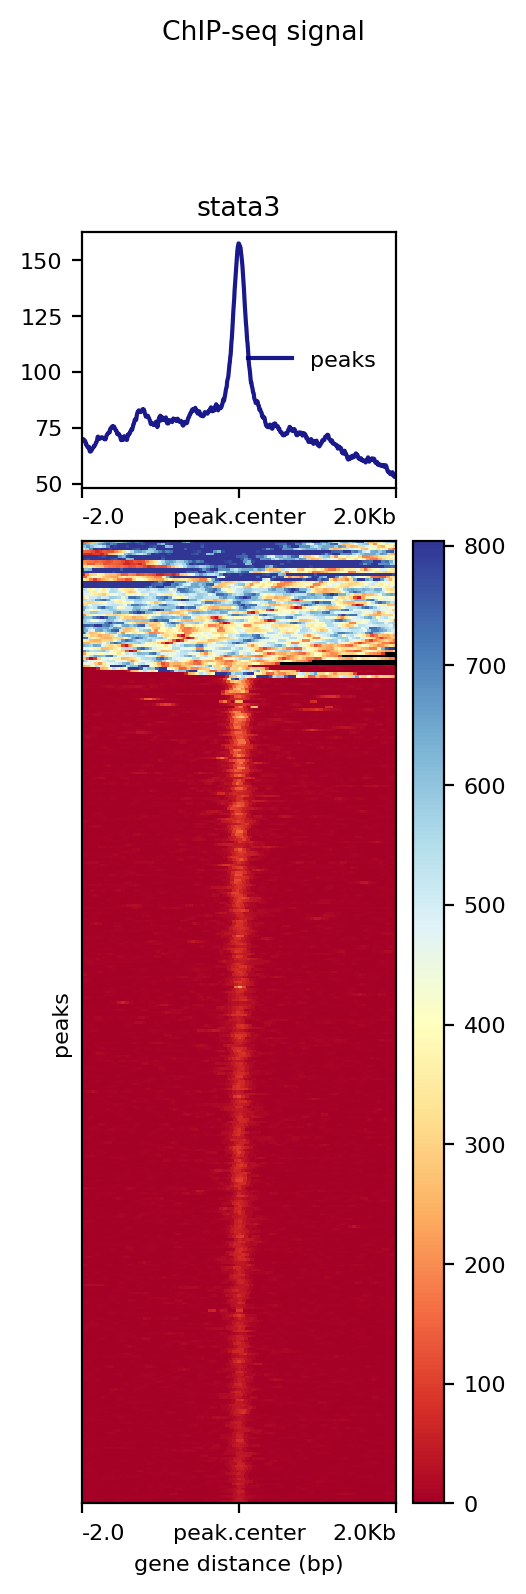

There is a big difference in the peak height among the all peaks !

## Motif Analysis

### 1. De novo motif discovery

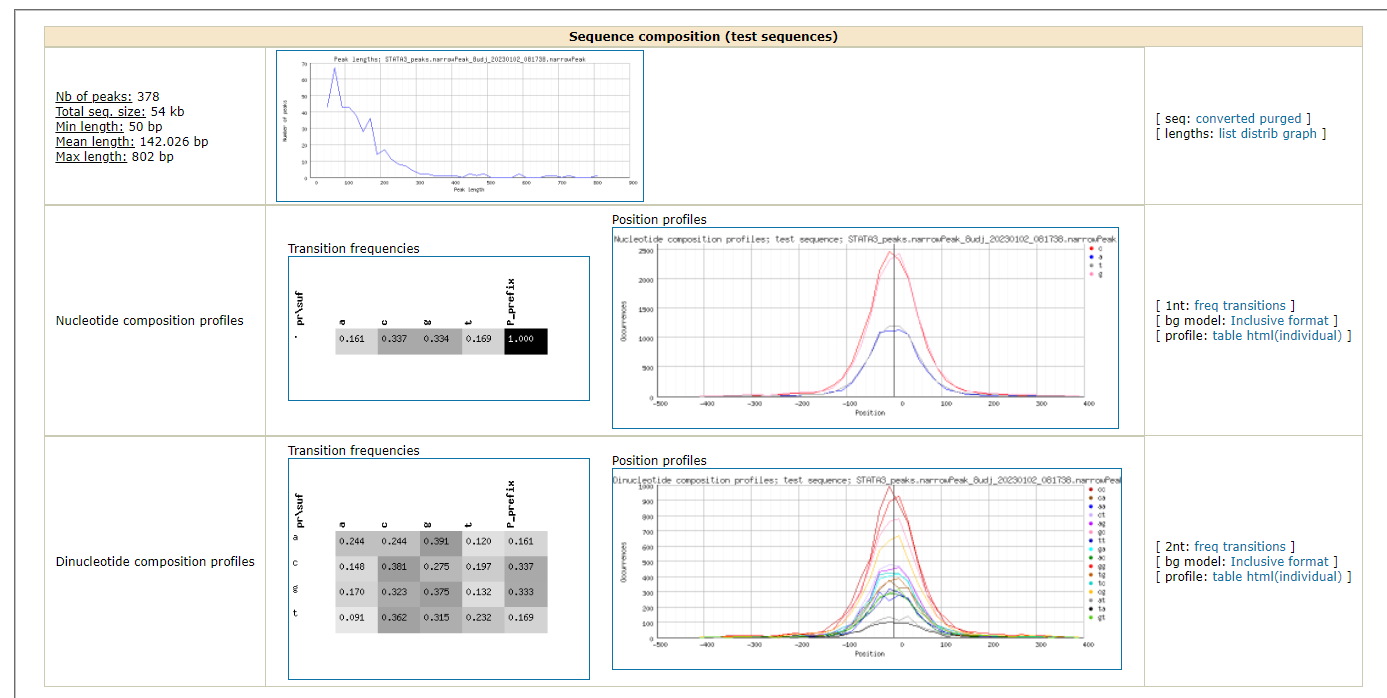

Here is one problem in the transition frequencies, the CG frequency is relatively high than expected.

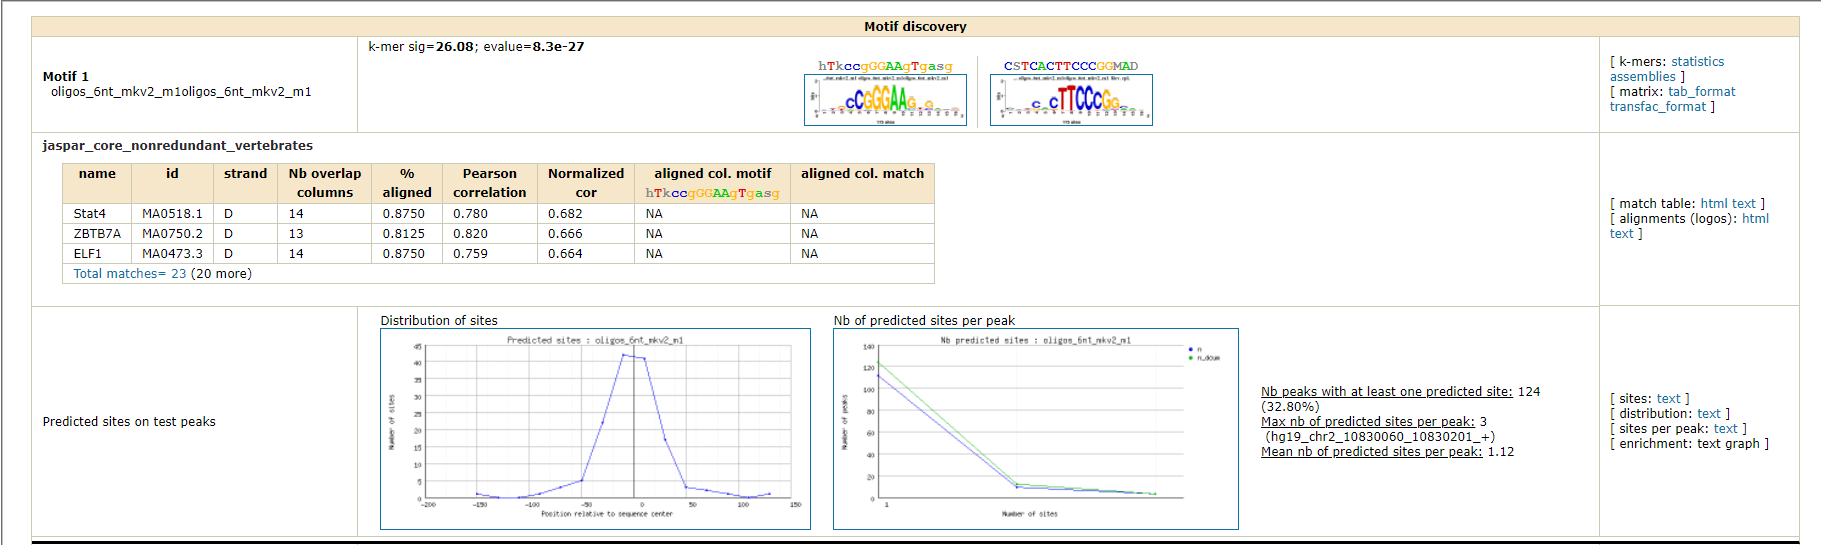

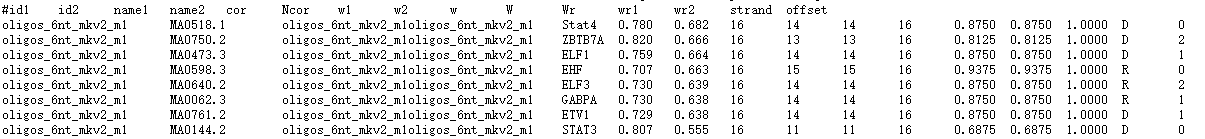

In the first rank motif, STAT3 is included in the 23 total matches and has 68.75% aligned, which is good! 32.80% of input peaks contain this motif.

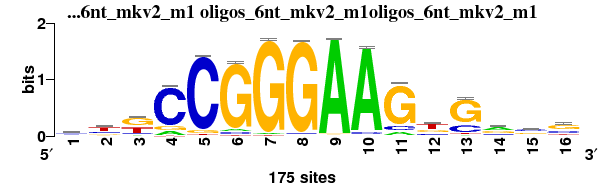

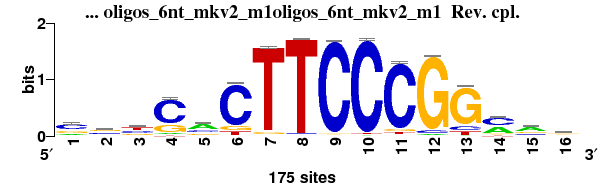

I was tring to find the correct motif in the database JASPAR, and found the most similar motif in the analysis, which is motif 6. With this motif STAT3 has 70.59% aligned, which is good! 35.71% of input peaks contain this motif.

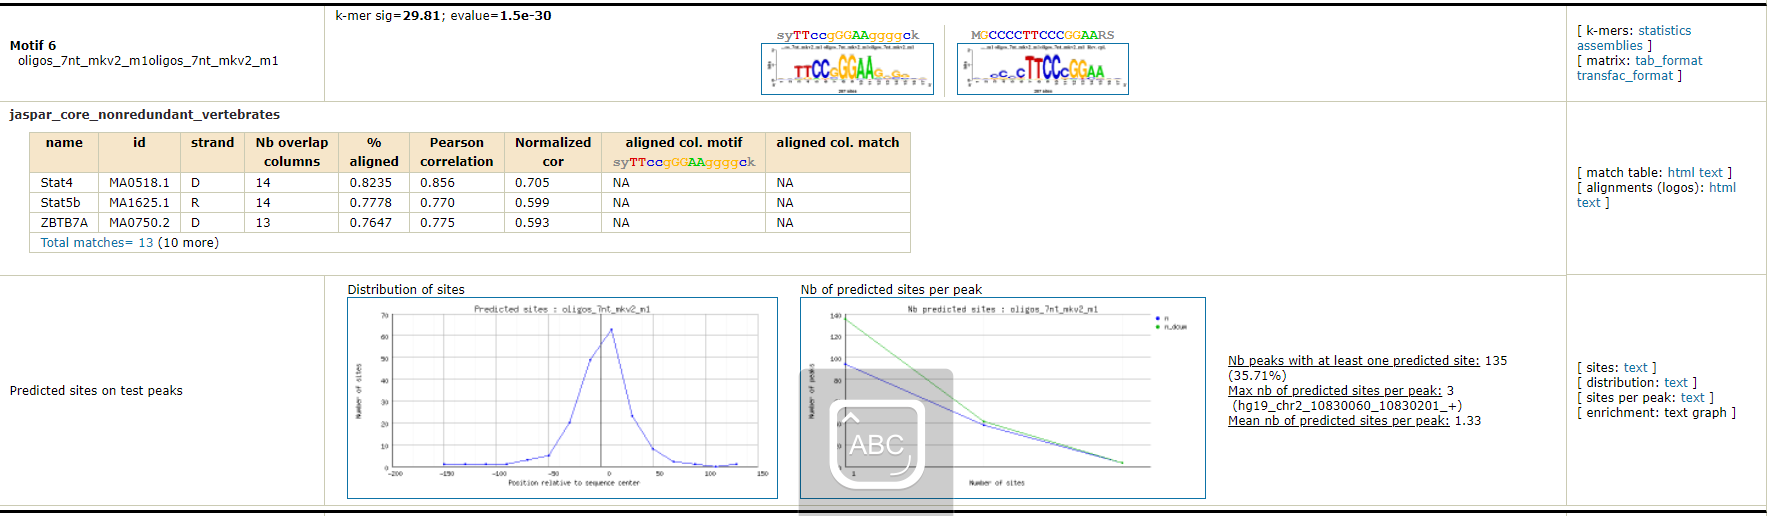

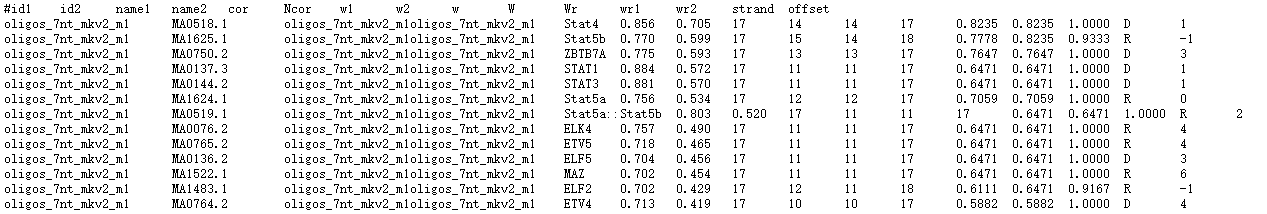

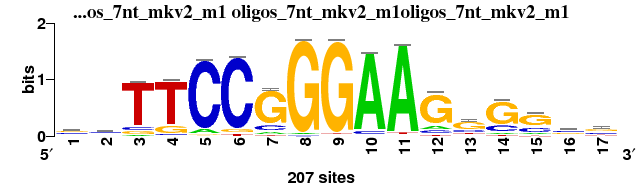

## Create a BED file with only the DIRECT peaks = peaks with the STAT3 motif

In [10]:
cat peak-motifs_oligos_7nt_mkv2_m1_sites.tab.txt | grep -v ";" | grep -v '#' | head

hg19_chr1_12079267_12079432_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_m1	R	24	40	GATTCCTGGAATGGGGC	8.8
hg19_chr1_12079267_12079432_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_m1	D	28	44	CATTCCAGGAATCGACC	8.4
hg19_chr1_25348805_25349038_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_m1	D	-28	-12	ATTTACGGGAAGGGGGG	12.1
hg19_chr1_26947094_26947226_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_m1	D	-18	-2	GTTTCCAGGAAGAGCTC	9.1
hg19_chr1_32645635_32645702_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_m1	D	-4	12	TGTGCCGGGAAGTGGCT	10.4
hg19_chr1_54355419_54355588_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_m1	D	1	17	TCCTCCGGGAAGAGCCC	7.7
hg19_chr1_100504412_100504482_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_m1	R	1	17	GACTCCGGGAAGTGAGG	8.8
hg19_chr1_150534516_150534812_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_m1	R	-23	-7	GCTTCCAGGAATCGCTG	8.2
hg19_chr1_155163106_155163239_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_m1	R	22	38	TATTCCGGGAAGTGGTG	13.3
hg19_chr1_155163106_155163239_+	site	oligos_7nt_mkv2_m1oligos_7nt_mkv2_

In [11]:
cat peak-motifs_oligos_7nt_mkv2_m1_sites.tab.txt | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 | head

chr1	12079267	12079432
chr1	12079267	12079432
chr1	25348805	25349038
chr1	26947094	26947226
chr1	32645635	32645702
chr1	54355419	54355588
chr1	100504412	100504482
chr1	150534516	150534812
chr1	155163106	155163239
chr1	155163106	155163239


In [12]:
cat peak-motifs_oligos_7nt_mkv2_m1_sites.tab.txt | grep -v ";" | grep -v '#' | cut -f 1 | tr "_" "\t" | cut -f 2-4 > stat3-allpeaks-with-motif-RSAT.bed

## PWM and track enrichment

I have uploaded ChIP-seq peak file to i-cisTarget https://gbiomed.kuleuven.be/apps/lcb/i-cisTarget/. 

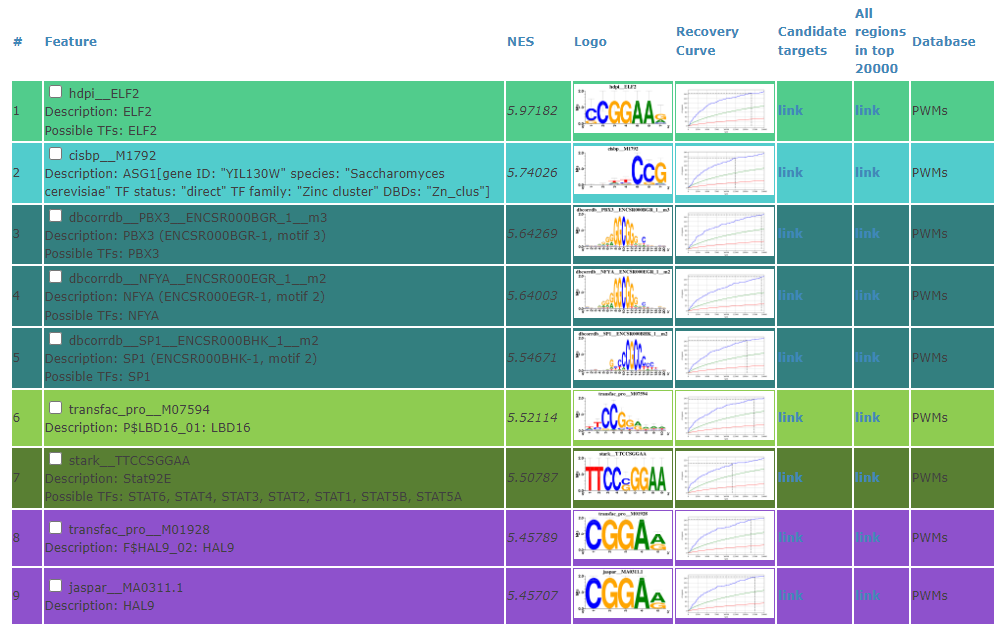

NO.7 motif looks like what I expected!

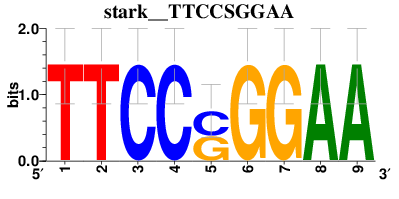

### Leading edge in i-cisTarget for the STAT3 motif = directly bound regions

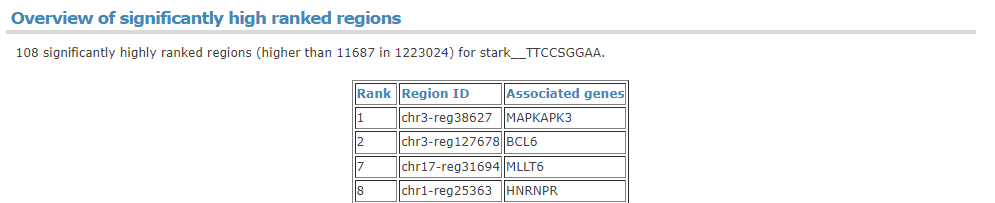

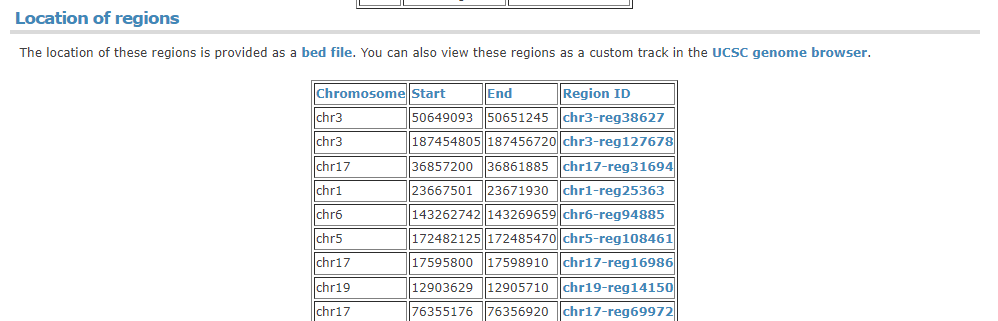

In [14]:
cat stark__TTCCSGGAA.targets.bed | head

track name=stark__TTCCSGGAA_candidate_targets description="" useScore=1
chr17	76355176	76356920	chr17-reg69972
chr11	123985537	123987395	chr11-reg88346
chr11	65341770	65343773	chr11-reg43390
chr12	49245283	49246780	chr12-reg32337
chr19	49402680	49404053	chr19-reg43605
chr10	43901245	43903520	chr10-reg30203
chr11	18415429	18418094	chr11-reg16009
chr21	34601480	34603639	chr21-reg10781
chr16	20910420	20913210	chr16-reg18699


In [15]:
cat stark__TTCCSGGAA.targets.bed | wc -l

108


There are 108 target genes in this bed file.

## Link Peaks to Genes

Use GREAT to link peaks to genes. 

Most of biological processes are related to the cellular differentiation and immunopathogenesis, especially T cell activation, which is related to the paper of the data source.

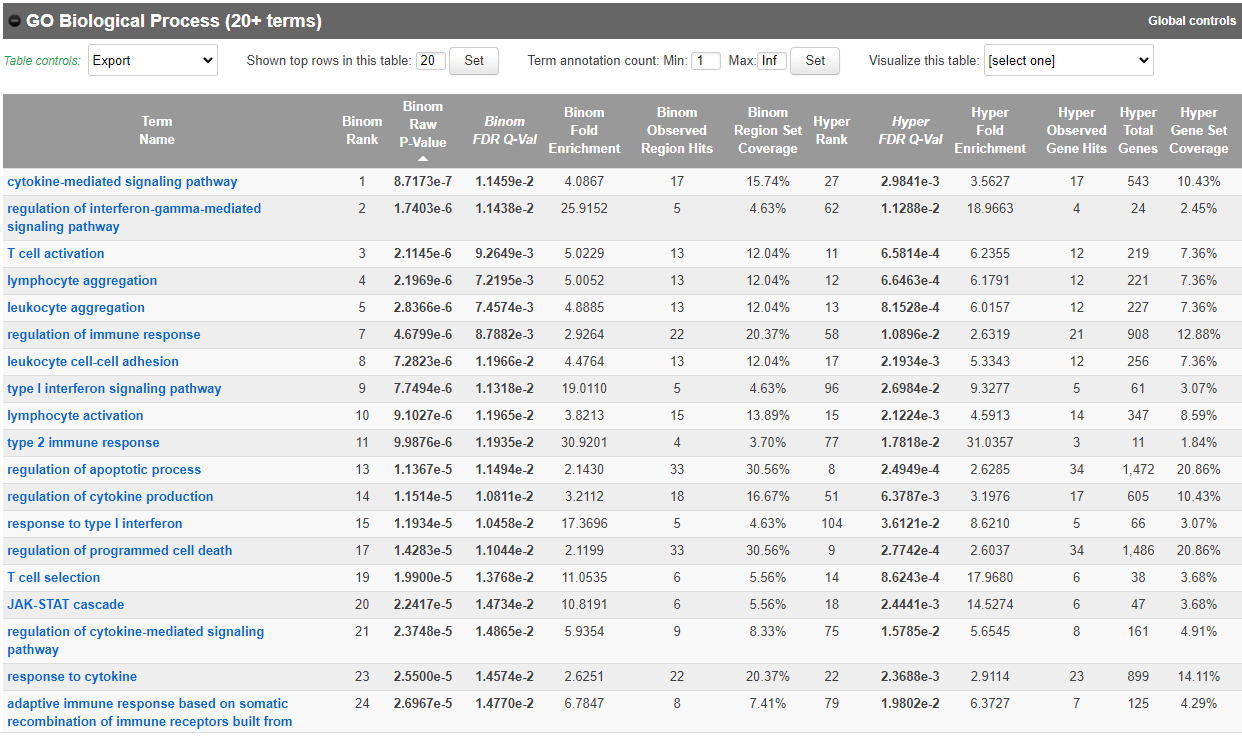

T cell activation:

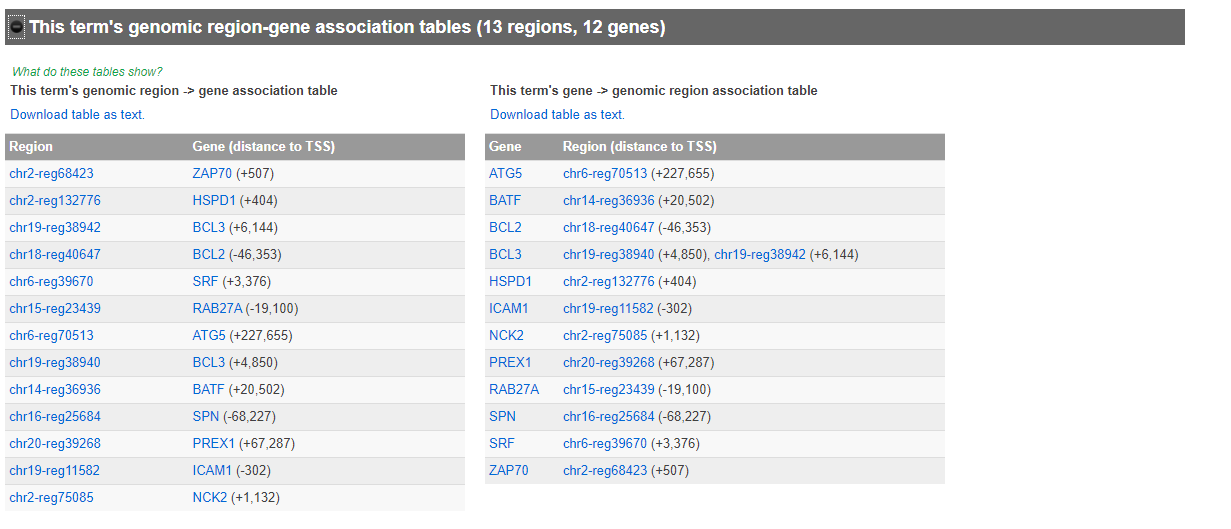

In [16]:
head 20230102-public-4.0.4-jKil30-hg19-all-gene.txt

# GREAT version 4.0.4	Species assembly: hg19	Association rule: Basal+extension: 5000 bp upstream, 1000 bp downstream, 1000000 bp max extension, curated regulatory domains included
ACAA1	chr3-reg26876 (-640)
ADAMTSL4	chr1-reg105405 (+13539)
ARHGAP31	chr3-reg79033 (+28631)
ARL8B	chr3-reg2799 (-135865)
ASXL1	chr20-reg22020 (-256), chr20-reg22021 (+1470)
ATG5	chr6-reg70513 (+227655)
BATF	chr14-reg36936 (+20502)
BCL2	chr18-reg40647 (-46353)
BCL3	chr19-reg38940 (+4850), chr19-reg38942 (+6144)


In [17]:
cat 20230102-public-4.0.4-jKil30-hg19-all-gene.txt | cut -f 1 | grep -v '#' | wc -l

164


In [34]:
cat 20230102-public-4.0.4-jKil30-hg19-all-gene.txt | cut -f 1 | grep -v '#' | grep HNRNPH2

HNRNPH2


I found the target gene used at the begining of this research.

In [19]:
cat 20230102-public-4.0.4-jKil30-hg19-all-gene.txt | cut -f 1 | grep -v '#' > STAT3-targets-GREAT.txt

## Comparison of predicted targets with functional associations to STAT3
Using https://string-db.org/ I obtain a network of associated genes with STAT3, based on genetic interactions, physical interactions, co-expression, and literature co-mentioning (in abstracts).

Here are 100 interactors with STAT3

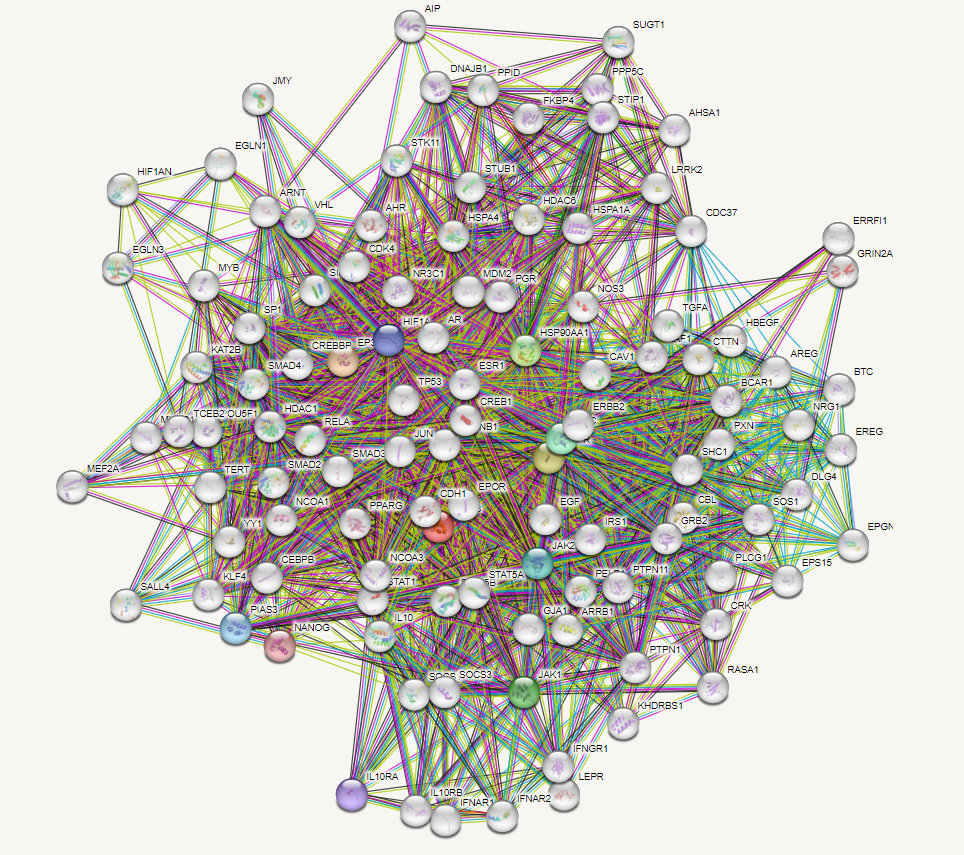

In [35]:
cat string_protein_annotations.tsv | cut -f1 | head

#node
AHR
AHSA1
AIP
AR
AREG
ARNT
ARRB1
BCAR1
BTC


In [37]:
cat string_protein_annotations.tsv | cut -f 1 | grep -v '#' > STAT3-string-top100.txt

In [38]:
list=`cat STAT3-string-top100.txt`

In [39]:
for i in $list; do grep -w $i STAT3-targets-GREAT.txt; done

DNAJB1
IFNAR2
NCOA1
SOCS1
SOCS3
STAT1


: 1

Not a lot genes are included, probably it is limited to the cell type, and there is no so many peaks in the narrowpeaks file as expected (only more than 300).

In [40]:
for i in $list; do grep -w $i STAT3-targets-GREAT.txt; done > targets.txt

: 1

This short list of genes has:
* a ChIP-seq peak nearby (<50kb)
* is somehow associated with STAT3
These are very good candidates to be STAT3 direct targets

## Conclusion

To investigate transcriptional control of Th17 cell differentiation, it is necessaray to perform a ChIP-seq to the binding site of STAT3, which is critical for transcriptional regulation of early human Th17 cell differentiation. Using the ChIP-seq result, we can identify the motif of the STAT3, and identify both the direct and indirect targets of STAT3. In the paper, they found that a number of SNPs from loci associated with immune-mediated disorders were located at sites where STAT3 binds to induce Th17 cell specification. Overall, this research provides important insights for modulating Th17-mediated pathogenic immune responses in humans.